## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import talib

def generate_TAs_features(df):
    """
    Function to generate Technical Analysis features:
    - MA (Moving Average)
    - RSI (Relative Strength Index)
    - MFI (Money Flow Index)
    """
    res = df.copy()
    for i in [7, 14, 21]:
        # Moving Average
        res[f'{i} DAYS MA'] = talib.MA(res['Close'], timeperiod=i)
        res[f'{i} DAYS MA'] = res[f'{i} DAYS MA'].shift(1)
        
        # RSI (Relative Strength Index)
        res[f'RSI {i}'] = talib.RSI(res['Close'], timeperiod=i)
        
        # MFI (Money Flow Index)
        res[f'MFI {i}'] = talib.MFI(res['High'], res['Low'], res['Close'], res['Volume'], timeperiod=i)
        
        # Standard Deviation
        if i == 7:
            res[f'{i} DAYS STD DEV'] = res['Close'].rolling(i).std()
            res[f'{i} DAYS STD DEV'] = res[f'{i} DAYS STD DEV'].shift(1)
    
    print(res.isnull().sum())
    res = res[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',            
               '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV',
               'RSI 7', 'RSI 14', 'RSI 21',            
               'MFI 7', 'MFI 14', 'MFI 21']]
    res = res.dropna()
    return res

def generate_date_related_features(df):
    """
    Function to generate date related features
    """
    res = df.copy()
    res['dayofweek'] = df.index.dayofweek
    res['quarter'] = df.index.quarter
    res['month'] = df.index.month
    res['year'] = df.index.year
    res['dayofyear'] = df.index.dayofyear
    res['dayofmonth'] = df.index.day
    res['weekofyear'] = df.index.isocalendar().week
    return res

In [3]:
import yfinance as yf

In [4]:
df = yf.download('TLKM.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,1880.0,1880.0,1850.0,1880.0,1451.125244,72222500
2012-09-19,1880.0,1910.0,1870.0,1880.0,1451.125244,117850000
2012-09-20,1880.0,1880.0,1850.0,1880.0,1451.125244,56595000
2012-09-21,1880.0,1890.0,1860.0,1880.0,1451.125244,56237500
2012-09-24,1850.0,1880.0,1840.0,1850.0,1427.968994,54650000


In [5]:
df.index = pd.to_datetime(df.index)

## Feature Extraction

In [6]:
df2 = generate_TAs_features(df)
df2.head()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
RSI 7              7
MFI 7              7
7 DAYS STD DEV     7
14 DAYS MA        14
RSI 14            14
MFI 14            14
21 DAYS MA        21
RSI 21            21
MFI 21            21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21
Date,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1950.0,1505.156494,133372500,1935.714286,1913.571429,1898.571429,18.126539,61.244408,60.680000,61.290323,73.228646,74.111593,70.085947
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718994,64702500,1940.000000,1919.285714,1901.904762,17.320508,51.610871,55.257616,57.401813,54.408963,65.564526,63.651946
2012-10-19,1930.0,1960.0,1930.0,1930.0,1489.718994,71067500,1940.000000,1922.142857,1904.285714,17.320508,51.610871,55.257616,57.401813,62.180986,72.405609,68.484889
2012-10-22,1910.0,1940.0,1910.0,1910.0,1474.281494,62315000,1940.000000,1925.714286,1906.666667,17.320508,42.509637,50.068659,53.649205,43.306192,64.820876,63.773028
2012-10-23,1930.0,1940.0,1890.0,1930.0,1489.718994,88507500,1934.285714,1926.428571,1908.095238,19.880596,52.319196,54.654383,56.626496,43.306192,61.549478,66.534319


In [7]:
df3 = generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,...,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1950.0,1505.156494,133372500,1935.714286,1913.571429,1898.571429,18.126539,...,73.228646,74.111593,70.085947,2,4,10,2012,291,17,42
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718994,64702500,1940.000000,1919.285714,1901.904762,17.320508,...,54.408963,65.564526,63.651946,3,4,10,2012,292,18,42
2012-10-19,1930.0,1960.0,1930.0,1930.0,1489.718994,71067500,1940.000000,1922.142857,1904.285714,17.320508,...,62.180986,72.405609,68.484889,4,4,10,2012,293,19,42
2012-10-22,1910.0,1940.0,1910.0,1910.0,1474.281494,62315000,1940.000000,1925.714286,1906.666667,17.320508,...,43.306192,64.820876,63.773028,0,4,10,2012,296,22,43
2012-10-23,1930.0,1940.0,1890.0,1930.0,1489.718994,88507500,1934.285714,1926.428571,1908.095238,19.880596,...,43.306192,61.549478,66.534319,1,4,10,2012,297,23,43


In [8]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1935.714286,1913.571429,1898.571429,18.126539,61.244408,60.680000,61.290323,73.228646,74.111593,70.085947,2,4,10,2012,291,17,42
2012-10-18,1930.0,1940.000000,1919.285714,1901.904762,17.320508,51.610871,55.257616,57.401813,54.408963,65.564526,63.651946,3,4,10,2012,292,18,42
2012-10-19,1930.0,1940.000000,1922.142857,1904.285714,17.320508,51.610871,55.257616,57.401813,62.180986,72.405609,68.484889,4,4,10,2012,293,19,42
2012-10-22,1910.0,1940.000000,1925.714286,1906.666667,17.320508,42.509637,50.068659,53.649205,43.306192,64.820876,63.773028,0,4,10,2012,296,22,43
2012-10-23,1930.0,1934.285714,1926.428571,1908.095238,19.880596,52.319196,54.654383,56.626496,43.306192,61.549478,66.534319,1,4,10,2012,297,23,43


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2012-10-17 to 2022-09-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2459 non-null   float64
 1   7 DAYS MA       2459 non-null   float64
 2   14 DAYS MA      2459 non-null   float64
 3   21 DAYS MA      2459 non-null   float64
 4   7 DAYS STD DEV  2459 non-null   float64
 5   RSI 7           2459 non-null   float64
 6   RSI 14          2459 non-null   float64
 7   RSI 21          2459 non-null   float64
 8   MFI 7           2459 non-null   float64
 9   MFI 14          2459 non-null   float64
 10  MFI 21          2459 non-null   float64
 11  dayofweek       2459 non-null   int64  
 12  quarter         2459 non-null   int64  
 13  month           2459 non-null   int64  
 14  year            2459 non-null   int64  
 15  dayofyear       2459 non-null   int64  
 16  dayofmonth      2459 non-null   int64  
 17  weekofyear     

In [10]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,1935.714286,1913.571429,1898.571429,18.126539,61.244408,60.680000,61.290323,73.228646,74.111593,70.085947,2,4,10,2012,291,17,42,1950.0
2012-10-18,1940.000000,1919.285714,1901.904762,17.320508,51.610871,55.257616,57.401813,54.408963,65.564526,63.651946,3,4,10,2012,292,18,42,1930.0
2012-10-19,1940.000000,1922.142857,1904.285714,17.320508,51.610871,55.257616,57.401813,62.180986,72.405609,68.484889,4,4,10,2012,293,19,42,1930.0
2012-10-22,1940.000000,1925.714286,1906.666667,17.320508,42.509637,50.068659,53.649205,43.306192,64.820876,63.773028,0,4,10,2012,296,22,43,1910.0
2012-10-23,1934.285714,1926.428571,1908.095238,19.880596,52.319196,54.654383,56.626496,43.306192,61.549478,66.534319,1,4,10,2012,297,23,43,1930.0


## Data Standardization

In [11]:
scaled_df = df4.copy()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
features_scaler = StandardScaler()
features = scaled_df.columns[:-1]
scaled_df[features] = features_scaler.fit_transform(scaled_df[features])

In [14]:
close_scaler = StandardScaler()
scaled_df['Close'] = close_scaler.fit_transform(np.array(scaled_df['Close']).reshape(-1,1))

In [15]:
scaled_df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-1.901334,-1.927720,-1.944208,-1.101544,0.683641,0.956443,1.268434,1.023638,1.496048,1.474483,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,-1.884821
2012-10-18,-1.895749,-1.920264,-1.939855,-1.125565,0.002534,0.390498,0.764540,0.097491,0.901053,0.930980,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,-1.910838
2012-10-19,-1.895749,-1.916537,-1.936745,-1.125565,0.002534,0.390498,0.764540,0.479965,1.377288,1.339236,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,-1.910838
2012-10-22,-1.895749,-1.911877,-1.933636,-1.125565,-0.640938,-0.151083,0.278258,-0.448894,0.849284,0.941209,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,-1.936855
2012-10-23,-1.903195,-1.910945,-1.931770,-1.049270,0.052614,0.327538,0.664071,-0.448894,0.621549,1.174465,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,-1.910838


## Save Files

### Save scalers

In [16]:
from joblib import dump, load

In [17]:
dump(features_scaler, 'tlkm_features_scaler.bin', compress=True)

['tlkm_features_scaler.bin']

In [18]:
dump(close_scaler, 'tlkm_close_scaler.bin', compress=True)

['tlkm_close_scaler.bin']

In [19]:
test_loaded_sc = load('tlkm_close_scaler.bin')
test_loaded_sc.inverse_transform(np.array(scaled_df['Close']).reshape(-1,1))[0]

array([1950.])

### Save .csv file

In [20]:
scaled_df.to_csv('../cleaned_data/TLKM.csv')

## EDA

In [21]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


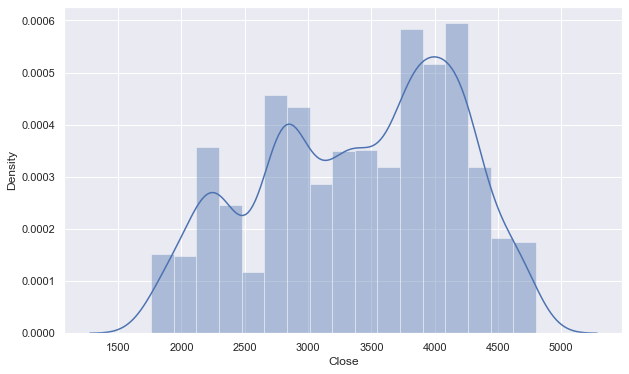

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df4['Close'])
plt.show()

In [23]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

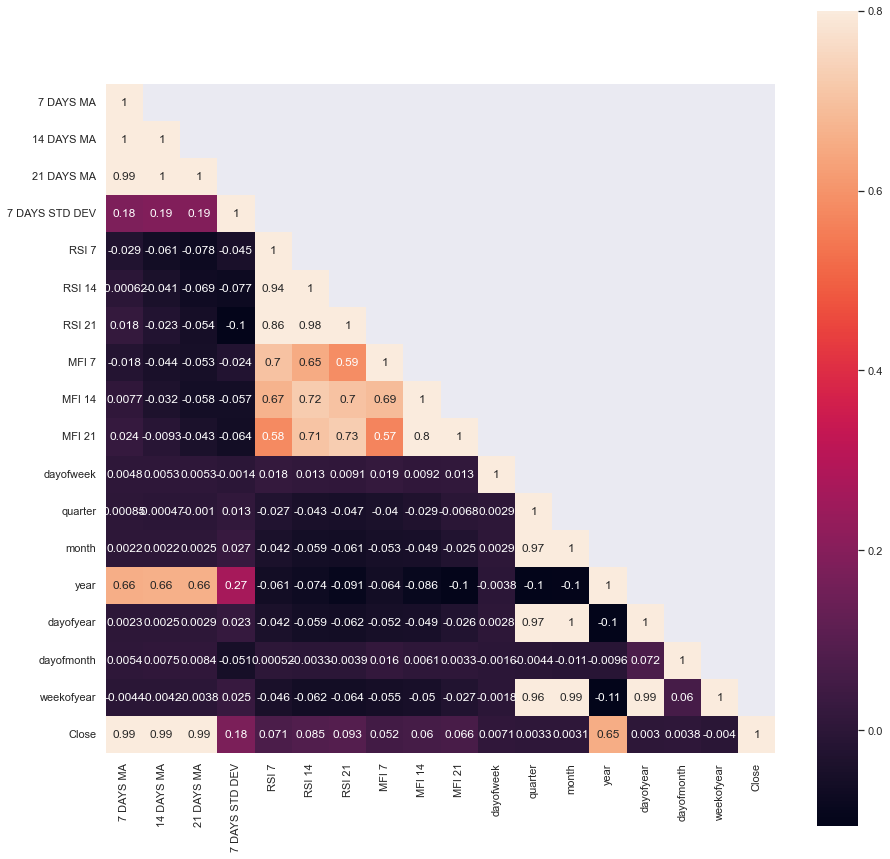

In [24]:
corr_data = scaled_df.corr()
plot_corr_coef(corr_data)

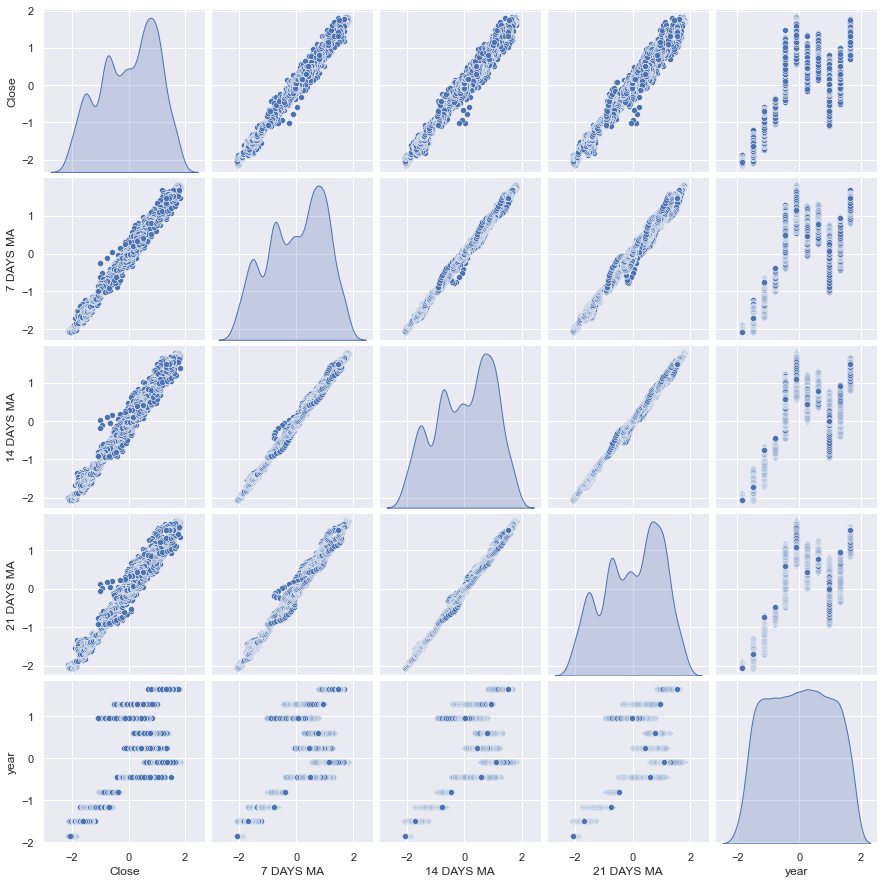

In [25]:
sns.pairplot(scaled_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', 'year']], diag_kind='kde')
plt.show()